In [1]:
import re
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [2]:
#Leemos los datos
sw_iv = pd.read_table("archive/SW_EpisodeIV.txt")
sw_iv.head()

,"character ""dialogue"""
0,"1 ""THREEPIO"" ""Did you hear that? They've shut..."
1,"2 ""THREEPIO"" ""We're doomed!"""
2,"3 ""THREEPIO"" ""There'll be no escape for the Pr..."
3,"4 ""THREEPIO"" ""What's that?"""
4,"5 ""THREEPIO"" ""I should have known better than ..."


In [3]:
sw_iv['texto'] = sw_iv['character "dialogue"']

In [4]:
sw_iv['sentimiento'] = sw_iv['texto'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
sw_iv.head()

,"character ""dialogue""",texto,sentimiento
0,"1 ""THREEPIO"" ""Did you hear that? They've shut...","1 ""THREEPIO"" ""Did you hear that? They've shut...",-0.6239
1,"2 ""THREEPIO"" ""We're doomed!""","2 ""THREEPIO"" ""We're doomed!""",-0.6696
2,"3 ""THREEPIO"" ""There'll be no escape for the Pr...","3 ""THREEPIO"" ""There'll be no escape for the Pr...",-0.1326
3,"4 ""THREEPIO"" ""What's that?""","4 ""THREEPIO"" ""What's that?""",0.0000
4,"5 ""THREEPIO"" ""I should have known better than ...","5 ""THREEPIO"" ""I should have known better than ...",0.7351


In [5]:
sw_iv[['texto', 'sentimiento']].sort_values('sentimiento')

,texto,sentimiento
606,"607 ""HAN"" ""Uh, uh, negative, negative. We had...",-0.9392
697,"698 ""THREEPIO"" ""Listen to them! They're dying...",-0.8877
263,"264 ""BEN"" ""A young Jedi named Darth Vader, who...",-0.8720
440,"441 ""BEN"" ""I felt a great disturbance in the F...",-0.8689
288,"289 ""VADER"" ""Don't be too proud of this techno...",-0.8609
...,...,...
84,"85 ""BIGGS"" ""I feel for you, Luke, you're going...",0.8952
604,"605 ""HAN"" ""Uh... had a slight weapons malfunct...",0.9126
255,"256 ""BEN"" ""He was the best star-pilot in the g...",0.9257
91,"92 ""LUKE"" ""Well, I'll be at the Academy next s...",0.9325


In [6]:
sw_iv.loc[573]['texto']

'574 "LUKE" "Yes.  Rich, powerful!  Listen, if you were to rescue her, the reward would be..."'

In [7]:
sw_iv.loc[606]['texto']

'607 "HAN" "Uh, uh, negative, negative.  We had a reactor leak here now.  Give us a few minutes to lock it down.  Large leak... very dangerous."'

In [8]:
posi=sw_iv['sentimiento']>0
nega=sw_iv['sentimiento']<0

In [9]:
positivo=sw_iv.loc[posi,]
negativo=sw_iv.loc[nega,]

In [10]:
print(positivo.shape)
print(negativo.shape)

(281, 3)
(248, 3)


In [11]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('english')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

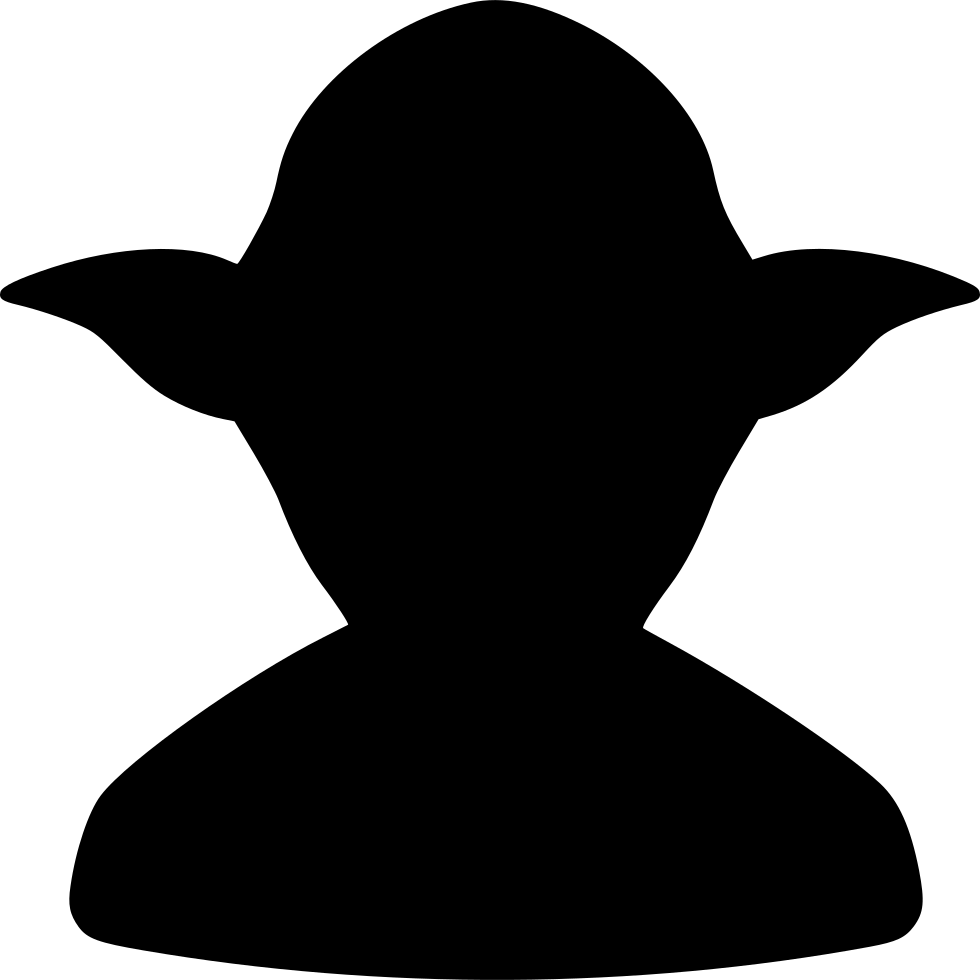

In [12]:
yoda= PIL.Image.open("yoda.png")
display(yoda)

In [13]:
mask=np.array(yoda)

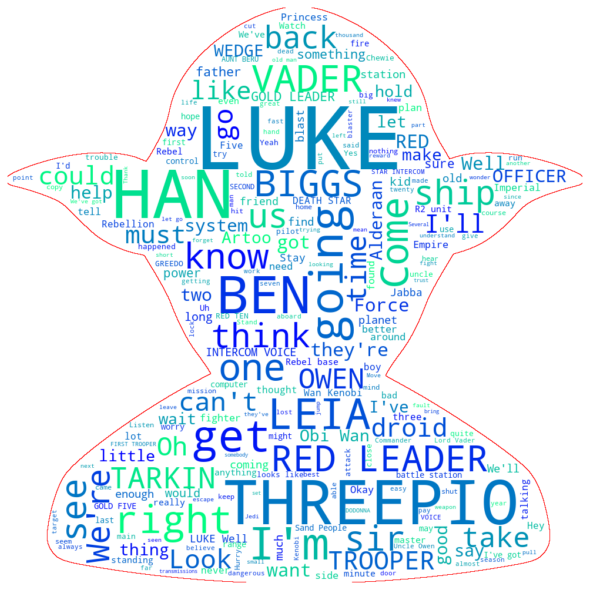

In [14]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = sw_iv.texto.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='winter',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='red').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("yoda_1.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
sw_v = pd.read_table("archive/SW_EpisodeV.txt")
sw_v.head()

,"character ""dialogue"""
0,"1 ""LUKE"" ""Echo Three to Echo Seven. Han, old b..."
1,"2 ""HAN"" ""Loud and clear, kid. What's up?"""
2,"3 ""LUKE"" ""Well, I finished my circle. I don't ..."
3,"4 ""HAN"" ""There isn't enough life on this ice c..."
4,"5 ""LUKE"" ""Right. I'll see you shortly. There's..."


In [16]:
sw_v['texto'] = sw_v['character "dialogue"']

In [17]:
sw_v['sentimiento'] = sw_v['texto'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
sw_v.head()

,"character ""dialogue""",texto,sentimiento
0,"1 ""LUKE"" ""Echo Three to Echo Seven. Han, old b...","1 ""LUKE"" ""Echo Three to Echo Seven. Han, old b...",0.0000
1,"2 ""HAN"" ""Loud and clear, kid. What's up?""","2 ""HAN"" ""Loud and clear, kid. What's up?""",0.3818
2,"3 ""LUKE"" ""Well, I finished my circle. I don't ...","3 ""LUKE"" ""Well, I finished my circle. I don't ...",0.2732
3,"4 ""HAN"" ""There isn't enough life on this ice c...","4 ""HAN"" ""There isn't enough life on this ice c...",0.0000
4,"5 ""LUKE"" ""Right. I'll see you shortly. There's...","5 ""LUKE"" ""Right. I'll see you shortly. There's...",0.0772


In [18]:
sw_v[['texto', 'sentimiento']].sort_values('sentimiento')

,texto,sentimiento
573,"574 ""YODA"" ""Decide you must how to serve them ...",-0.8641
17,"18 ""RIEEKAN"" ""A death mark's not an easy thing...",-0.8484
777,"778 ""VADER"" ""You are beaten. It is useless to ...",-0.8316
766,"767 ""VADER"" ""Only your hatred can destroy me.""",-0.8271
681,"682 ""BOBA FETT"" ""He's no good to me dead.""",-0.7721
...,...,...
321,"322 ""LUKE"" ""Yes, I'm sure it's perfectly safe ...",0.9022
81,"82 ""THREEPIO"" ""Actually, Artoo has been known ...",0.9042
563,"564 ""YODA"" ""Concentrate...feel the Force flow....",0.9136
543,"544 ""THREEPIO"" ""I really don't see how thats g...",0.9153


In [19]:
sw_v.loc[222]['texto']

'223 "THREEPIO" "Artoo, you take good care of Master Luke now, understand?  And...do take care of yourself. Oh, dear, oh, dear."'

In [20]:
sw_v.loc[573]['texto']

'574 "YODA" "Decide you must how to serve them best. If you leave now, help  them you could. But you would destroy all for which they have fought and suffered."'

In [21]:
posi1=sw_v['sentimiento']>0
nega1=sw_v['sentimiento']<0

In [22]:
positivo1=sw_v.loc[posi1,]
negativo1=sw_v.loc[nega1,]

In [23]:
print(positivo1.shape)
print(negativo1.shape)

(306, 3)
(169, 3)


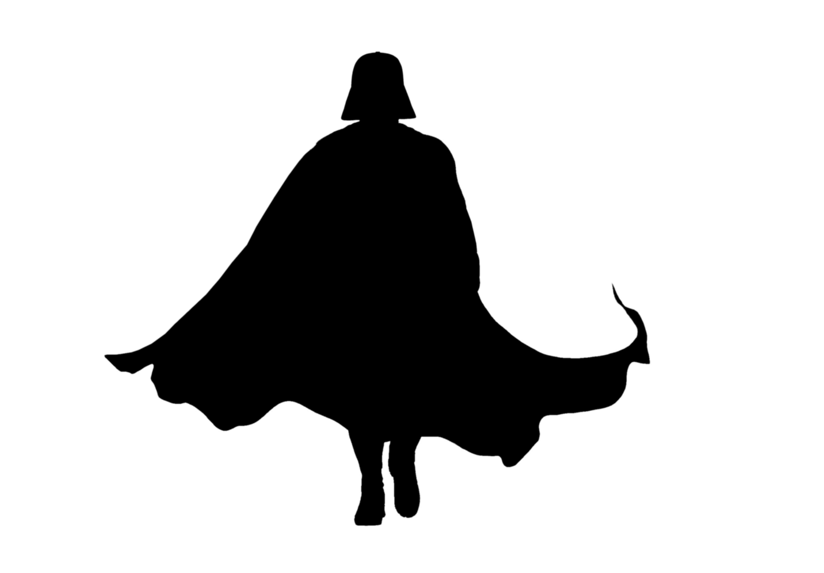

In [24]:
r2d2= PIL.Image.open("vader1.png")
display(r2d2)

In [25]:
mask=np.array(r2d2)

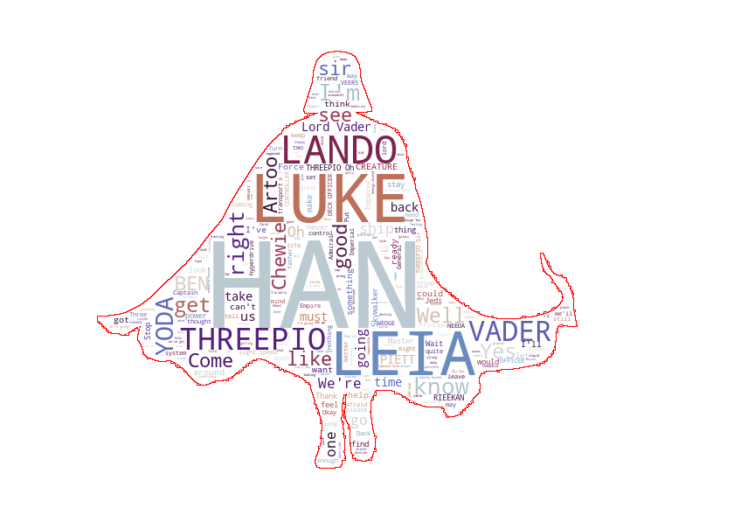

In [26]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = sw_v.texto.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='twilight',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='red').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("r2d2_1.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [27]:
sw_vi = pd.read_table("archive/SW_EpisodeVI.txt")
sw_vi.head()

,"character ""dialogue"""
0,"1 ""SHUTTLE CAPTAIN"" ""Command station, this is ..."
1,"2 ""DEATH STAR CONTROLLER"" ""The security deflec..."
2,"3 ""SHUTTLE CAPTAIN"" ""We're starting our approa..."
3,"4 ""OFFICER"" ""Inform the commander that Lord Va..."
4,"5 ""OPERATOR"" ""Yes, sir."""


In [28]:
sw_vi['texto'] = sw_vi['character "dialogue"']

In [29]:
sw_vi['sentimiento'] = sw_vi['texto'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
sw_vi.head()

,"character ""dialogue""",texto,sentimiento
0,"1 ""SHUTTLE CAPTAIN"" ""Command station, this is ...","1 ""SHUTTLE CAPTAIN"" ""Command station, this is ...",0.3400
1,"2 ""DEATH STAR CONTROLLER"" ""The security deflec...","2 ""DEATH STAR CONTROLLER"" ""The security deflec...",-0.1613
2,"3 ""SHUTTLE CAPTAIN"" ""We're starting our approa...","3 ""SHUTTLE CAPTAIN"" ""We're starting our approa...",0.0000
3,"4 ""OFFICER"" ""Inform the commander that Lord Va...","4 ""OFFICER"" ""Inform the commander that Lord Va...",0.0000
4,"5 ""OPERATOR"" ""Yes, sir.""","5 ""OPERATOR"" ""Yes, sir.""",0.4019


In [30]:
sw_vi[['texto', 'sentimiento']].sort_values('sentimiento')

,texto,sentimiento
223,"224 ""YODA"" ""Remember, a Jedi's strength flows ...",-0.9153
263,"264 ""MON MOTHMA"" ""The data brought to us by th...",-0.8992
598,"599 ""EMPEROR"" ""Good. I can feel your anger. I ...",-0.8858
228,"229 ""LUKE"" ""You told me Vader betrayed and mur...",-0.8555
265,"266 ""ACKBAR"" ""You can see here the Death Star ...",-0.8412
...,...,...
416,"417 ""LEIA"" ""But these are my friends. Threepio...",0.8625
58,"59 ""NINEDENINE"" ""You're a feisty little one, b...",0.9052
391,"392 ""HAN"" ""Nice work. Great, Chewie! Great! Al...",0.9115
39,"40 ""LUKE"" ""Greetings, Exalted One. Allow me to...",0.9260


In [31]:
sw_vi.loc[145]['texto']

'146 "THREEPIO" "Victims of the almighty Sarlacc: His Excellency hopes that you will die honorably. But should any of you wish to beg for mercy, the great Jabba the Hutt will now listen to your pleas."'

In [32]:
sw_vi.loc[223]['texto']

'224 "YODA" "Remember, a Jedi\'s strength flows from the Force.  But beware.  Anger, fear, aggression. The dark side are they.  Once you start down the dark path, forever will it dominate your destiny."'

In [33]:
posi2=sw_vi['sentimiento']>0
nega2=sw_vi['sentimiento']<0

In [34]:
positivo2=sw_vi.loc[posi2,]
negativo2=sw_vi.loc[nega2,]

In [35]:
print(positivo2.shape)
print(negativo2.shape)

(225, 3)
(147, 3)


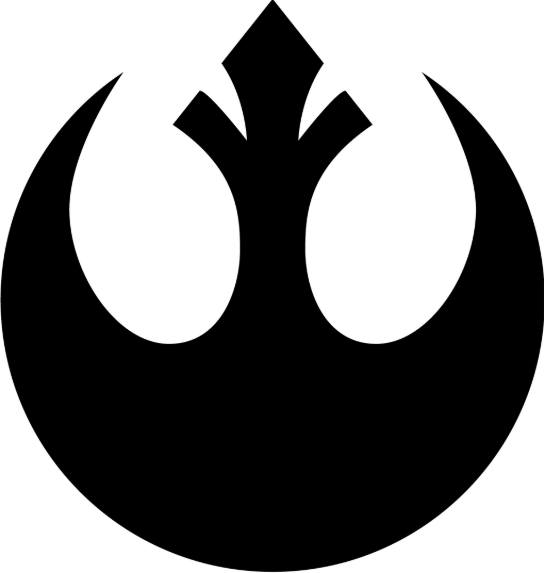

In [36]:
rebel= PIL.Image.open("rebel alliance.png")
display(rebel)

In [37]:
mask=np.array(rebel)

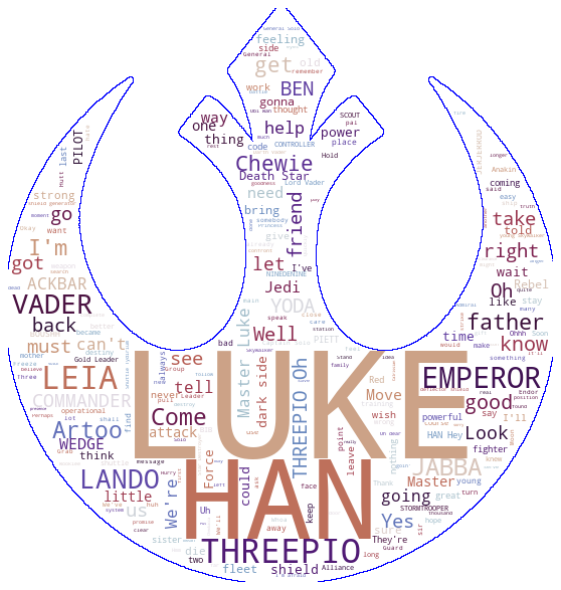

In [38]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = sw_vi.texto.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='twilight',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("rebel_1.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()